**CS3MIR Lab 7 Image Search - Searching using Colors**

In this lab, you will learn how to simply segment an object from an image based on color in Python using OpenCV. A popular computer vision library written in C/C++ with bindings for Python, OpenCV provides easy ways of manipulating color spaces.

**What Are Color Spaces?**

In the most common color space, RGB (Red Green Blue), colors are represented in terms of their red, green, and blue components. In more technical terms, RGB describes a color as a tuple of three components. Each component can take a value between 0 and 255, where the tuple (0, 0, 0) represents black and (255, 255, 255) represents white.

RGB is considered an “additive” color space, and colors can be imagined as being produced from shining quantities of red, blue, and green light onto a black background.

Here are a few more examples of colors in RGB:

Color	RGB value

Red	255, 0, 0

Orange	255, 128, 0

Pink	255, 153, 255

RGB is one of the five major color space models, each of which has many offshoots. There are so many color spaces because different color spaces are useful for different purposes.

In [ ]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

Let's download the dataset

In [ ]:
!wget https://github.com/gvogiatzis/CS3320/raw/main/data/Lab6.zip
!unzip Lab6.zip -d Images

Let's load and examine an image

In [ ]:
nemo = cv2.imread('Images/Lab6/nemo0.jpg')
plt.imshow(nemo)
plt.show()

Hey, Nemo…or Dory? You’ll notice that it looks like the blue and red channels have been mixed up. In fact, OpenCV by default reads images in BGR format. You can use the cvtColor(image, flag) and the flag we looked at above to fix this:

In [ ]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

After executing the last step, Nemo should look much more like himself.

Visualizing Nemo in RGB Color Space

Let's visualizing the color distribution of the image pixels using a 3D plot, with each axis representing one of the channels in the color space. 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

These libraries provide the functionalities you need for the plot. You want to place each pixel in its location based on its components and color it by its color. OpenCV split() is very handy here; it splits an image into its component channels. The following code split the image and set up the 3D plot:

In [ ]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

Now that you have set up the plot, you need to set up the pixel colors. In order to color each pixel according to its true color, there’s a bit of reshaping and normalization required. You need the colors corresponding to every pixel in the image to be flattened into a list and normalized, so that they can be passed to the facecolors parameter of Matplotlib scatter().

Normalizing just means condensing the range of colors from 0-255 to 0-1 as required for the facecolors parameter. Lastly, facecolors wants a list, not an NumPy array:

In [ ]:
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

Now we have all the components ready for plotting: the pixel positions for each axis and their corresponding colors, in the format facecolors expects. You can build the scatter plot using the following code:

In [ ]:
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Now, Let's combine all the code together and see the 3D plot

In [ ]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Visualizing Nemo in HSV Color Space
We saw Nemo in RGB space, so now let’s view him in HSV space and compare.

HSV stands for Hue, Saturation, and Value (or brightness), and is a cylindrical color space. The colors, or hues, are modeled as an angular dimension rotating around a central, vertical axis, which represents the value channel. Values go from dark (0 at the bottom) to light at the top. The third axis, saturation, defines the shades of hue from least saturated, at the vertical axis, to most saturated furthest away from the center:
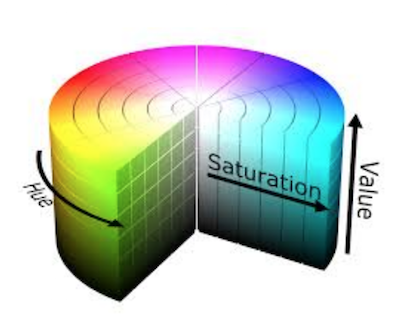


Your task is to 1) convert the image to HSV (you will need to use cv2.COLOR_RGB2HSV parameter for conversion), and 2) display the HSV color distribution using a 3D plot, the x-axis label should be "Hue", y-axis label should be "Saturation" and z-axis should be "Value"). Write the code and display the 3D plot. 

You will see in the HSV space, Nemo’s oranges are much more localized and visually separable. The saturation and value of the oranges do vary, but they are mostly located within a small range along the hue axis. This is the key point that can be leveraged for segmentation.

Let’s threshold Nemo just based on a simple range of oranges. 

In [ ]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

A simple way to display the colors in Python is to make small square images of the desired color and plot them in Matplotlib. Matplotlib only interprets colors in RGB, but handy conversion functions are provided for the major color spaces so that we can plot images in other color spaces.

In [ ]:
from matplotlib.colors import hsv_to_rgb

Let's build the small 10x10x3 squares, filled with the respective color. You can use NumPy to easily fill the squares with the color

In [ ]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

Now, Let's plot them together by converting them to RGB for viewing.

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

Once you get a decent color range, you can use cv2.inRange() to try to threshold Nemo. inRange() takes three parameters: the image, the lower range, and the higher range. It returns a binary mask (an ndarray of 1s and 0s) the size of the image where values of 1 indicate values within the range, and zero values indicate values outside.

In [ ]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

To impose the mask on top of the original image, you can use cv2.bitwise_and(), which keeps every pixel in the given image if the corresponding value in the mask is 1

In [ ]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

To see what that did exactly, let’s view both the mask and the original image with the mask on top:

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

There you have it! This has already done a decent job of capturing the orange parts of the fish. The only problem is that Nemo also has white stripes… Fortunately, adding a second mask that looks for whites is very similar to what you did already with the oranges.

Your task is to write the code to find the while stripes similar to the way we find orange ones. The color ranges you need to use will be:

light_white is (0, 0, 200)

dark_white is (145, 60, 255)

The mask name should be mask_white, and you should store the bitwise_and() result in result_white because these varibles are used later in the code.

Write the code and plot both the mask and mask on original image. 

Now, let's combine the masks. Adding the two masks together results in 1 values wherever there is orange or white, which is exactly what is needed. Let’s add the masks together and plot the results:

In [ ]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()